In [1]:
#database final.sqlite is created after cleaning the amazon food reviews data

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,f1_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn import cross_validation
import sqlite3
from sklearn.decomposition import TruncatedSVD
import seaborn as sns

from sklearn.metrics import confusion_matrix
from prettytable import PrettyTable
    
x = PrettyTable()

con=sqlite3.connect("final.sqlite")

# time based sorting
clean_reviews=pd.read_sql_query(""" Select * from Reviews Order By Time""" , con)
clean_reviews=clean_reviews[:150000]
cleaned_text=clean_reviews['CleanedText'].values
score=clean_reviews['Score']
score.value_counts()


C:\Users\Anvesh Pandey\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


positive    129548
negative     20452
Name: Score, dtype: int64

This is an unbalanced dataset

In [2]:
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["Vectorization", "Model", "alpha", "f1 score", "Accuracy"]

This is an unblanced dataset

#Featurization using Bag of Words and model using kNN for classification of review

In [3]:
#Featurization using BoW

from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer()#max_features=300)
x_tr,x_test,y_tr,y_test = cross_validation.train_test_split(cleaned_text,score,test_size=0.3,random_state=0)
training_set_transformed=count_vect.fit_transform(x_tr)



In [1]:
#NaiveBayes with 3 fold CV
#x_tr,x_test,y_tr,y_test = cross_validation.train_test_split(final_counts,score,test_size=0.3,random_state=0)
alpha_values=np.array([0.001,0.002,0.003,0.004,0.005,0.007,0.009,0.01,0.02,0.05,0.07,0.1,0.2,0.5,0.7,1.0,1.5,3])
cv_scores=[]
for a in alpha_values:
    bnb=MultinomialNB(alpha=a)
    scores=cross_val_score(bnb,training_set_transformed,y_tr,cv=3,scoring="f1_weighted")
    cv_scores.append(scores.mean())

optimal_alpha=alpha_values[cv_scores.index(max(cv_scores))]
plt.plot(alpha_values,cv_scores)
plt.xlabel('alpha')
plt.ylabel('f1_score')
plt.title("f1_score vs alpha for BoW featurization")
for xy in zip(alpha_values, np.round(cv_scores,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.show()
bnb_optimal=MultinomialNB(alpha=optimal_alpha)
bnb_optimal.fit(training_set_transformed,y_tr)
x_test=count_vect.transform(x_test)
pred=bnb_optimal.predict(x_test)
acc=accuracy_score(y_test,pred)

print ("Optimal_alpha for BoW featurizatin and MultinomialNB Naive Bayes is ",optimal_alpha)
np.round(acc*100,2)
print ("Accuracy is ",np.round(acc*100,2))


NameError: name 'np' is not defined

In [5]:
bnb_optimal.coef_[0]

array([-14.50027784, -14.50027784, -14.50027784, ..., -14.50027784,
       -14.50027784, -14.50027784])

In [6]:
feature_names=count_vect.get_feature_names()

In [7]:
coefs_with_fns = sorted(zip(bnb_optimal.coef_[0], feature_names),reverse=True)


In [8]:
coefs_with_fns[:10]

[(-4.4628586100337255, 'like'),
 (-4.505721713589901, 'tast'),
 (-4.647628579738383, 'good'),
 (-4.664291627498018, 'flavor'),
 (-4.707271738597591, 'great'),
 (-4.715087060716295, 'love'),
 (-4.733732535169869, 'tea'),
 (-4.742812818602035, 'use'),
 (-4.808212366007565, 'one'),
 (-4.881117213131823, 'product')]

f score is  0.907323333652497
[[ 3959  2169]
 [ 1973 36899]]
AxesSubplot(0.125,0.125;0.62x0.755)
             precision    recall  f1-score   support

   negative       0.67      0.65      0.66      6128
   positive       0.94      0.95      0.95     38872

avg / total       0.91      0.91      0.91     45000



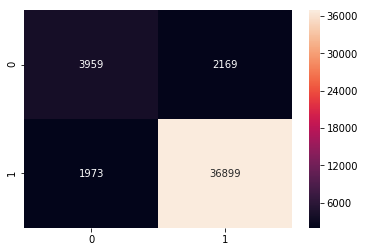

In [9]:

f1=f1_score(y_test,pred,average='weighted')
print ("f1 score is ", f1)
c_matrix=confusion_matrix(y_test, pred)
print (c_matrix)
print (sns.heatmap(c_matrix,annot=True,fmt="d"))
print (classification_report(y_test, pred))

f1 score of 90.73% is good 

In [10]:
x.add_row(["BoW","MultinomialNB",optimal_alpha,f1,acc])

In [11]:
#Tfidf
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer()
x_tr,x_test,y_tr,y_test = cross_validation.train_test_split(cleaned_text,score,test_size=0.3,random_state=0)
training_set_transformed=tf_idf_vect.fit_transform(x_tr)
#final_counts= tf_idf_vect.fit_transform(clean_reviews['CleanedText'].values)
#final_counts=final_counts.toarray()

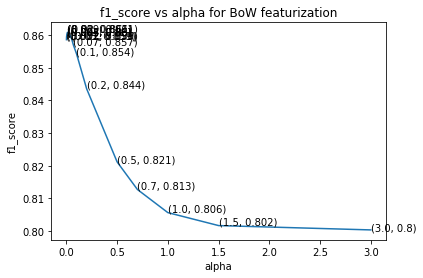

Optimal_alpha for tfidf featurizatin and MultinomialNB Naive Bayes is  0.02
Accuracy is  88.74


In [12]:
#NaiveBayes with 3 fold CV
#x_tr,x_test,y_tr,y_test = cross_validation.train_test_split(final_counts,score,test_size=0.3,random_state=0)
alpha_values=np.array([0.001,0.002,0.003,0.004,0.005,0.007,0.009,0.01,0.02,0.05,0.07,0.1,0.2,0.5,0.7,1.0,1.5,3])
cv_scores=[]
for a in alpha_values:
    bnb=MultinomialNB(alpha=a)
    scores=cross_val_score(bnb,training_set_transformed,y_tr,cv=3,scoring="f1_weighted")                       
    cv_scores.append(scores.mean())

optimal_alpha=alpha_values[cv_scores.index(max(cv_scores))]
plt.plot(alpha_values,cv_scores)
plt.xlabel('alpha')
plt.ylabel('f1_score')
plt.title("f1_score vs alpha for BoW featurization")
for xy in zip(alpha_values, np.round(cv_scores,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.show()
bnb_optimal=MultinomialNB(alpha=optimal_alpha)
bnb_optimal.fit(training_set_transformed,y_tr)
x_test=tf_idf_vect.transform(x_test)
pred=bnb_optimal.predict(x_test)
acc=accuracy_score(y_test,pred)

print ("Optimal_alpha for tfidf featurizatin and MultinomialNB Naive Bayes is ",optimal_alpha)
np.round(acc*100,2)
print ("Accuracy is ",np.round(acc*100,2))


In [13]:
bnb_optimal.coef_
features=tf_idf_vect.get_feature_names()
coefs_with_fns = sorted(zip(bnb_optimal.coef_[0], feature_names),reverse=True)
coefs_with_fns[:10]

[(-5.048788198831037, 'great'),
 (-5.072261165949444, 'tea'),
 (-5.082480656788409, 'love'),
 (-5.128982019090316, 'tast'),
 (-5.132268172217945, 'good'),
 (-5.160796589341561, 'like'),
 (-5.2112246086931835, 'flavor'),
 (-5.249815008910997, 'coffe'),
 (-5.297395653961967, 'product'),
 (-5.330101086878048, 'use')]

f1 score is used to determine the hyperparameter alpha - 1.4

f score is  0.8573081551894292
[[ 1322  4806]
 [  262 38610]]
AxesSubplot(0.125,0.125;0.62x0.755)
             precision    recall  f1-score   support

   negative       0.83      0.22      0.34      6128
   positive       0.89      0.99      0.94     38872

avg / total       0.88      0.89      0.86     45000



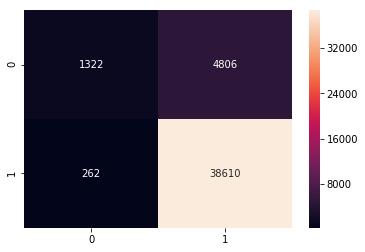

In [14]:
f1=f1_score(y_test,pred,average='weighted')
print ("f score is ", f1)
c_matrix=confusion_matrix(y_test, pred)
print (c_matrix)
print (sns.heatmap(c_matrix,annot=True,fmt="d"))
print (classification_report(y_test, pred))

f1 score is good 85.73%, infusing the confidence on the model 

In [15]:
x.add_row(["tfIdf","MultinomialNB ",optimal_alpha,f1,acc])

In [16]:
print (x)

+---------------+----------------+-------+--------------------+--------------------+
| Vectorization |     Model      | alpha |      f1 score      |      Accuracy      |
+---------------+----------------+-------+--------------------+--------------------+
|      BoW      | MultinomialNB  |  0.7  | 0.907323333652497  | 0.9079555555555555 |
|     tfIdf     | MultinomialNB  |  0.02 | 0.8573081551894292 | 0.8873777777777778 |
+---------------+----------------+-------+--------------------+--------------------+


Conclusion : as is evident from the table, the hyperparameter varies with the vectorization of the reviews. Highest f1 score and accuracy is attained with tfIdf and Naive Bayes. This is the best predicted model for 100k reviews. 
       As suggested in the last assignment, I tried figuring out the data leak in the model but could not get it. The top 10 features using both the featurization technique is almost the same. This shows that the two featurization algos are not totally out of sync.